<h2 style='color:blue' align='center'>Sports Celebrity Image Classification: Data Cleaning<h2>

In [3]:
import numpy as np
import cv2
import matplotlib
from matplotlib import pyplot as plt
%matplotlib inline

In [4]:
img = cv2.imread('C:/Users/swapn/Desktop/DS learning/Data Science project/Image recognization/CelebrityFaceRecognition/model/test_images/2.png')
img.shape

(1024, 1024, 3)

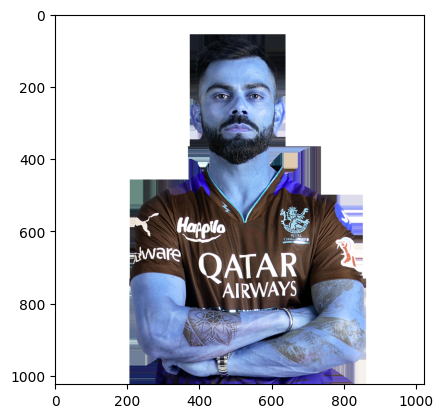

In [5]:
plt.imshow(img)

In [6]:
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
gray.shape

(1024, 1024)

In [7]:
gray

array([[255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       ...,
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255]], dtype=uint8)

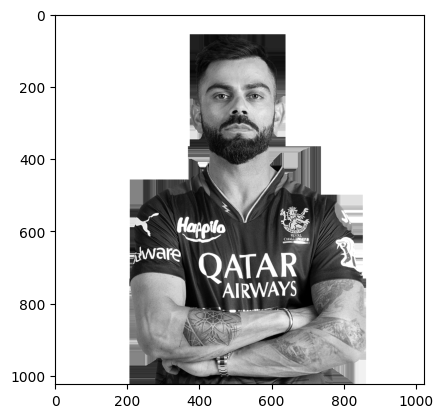

In [8]:
plt.imshow(gray, cmap='gray')

In [10]:
face_cascade = cv2.CascadeClassifier("C:\\Users\\swapn\\Desktop\\DS learning\\Data Science project\\Image recognization\\CelebrityFaceRecognition\\model\\opencv\\haarcascades\\haarcascade_frontalface_default.xml")
eye_cascade = cv2.CascadeClassifier("C:\\Users\\swapn\\Desktop\\DS learning\\Data Science project\\Image recognization\\CelebrityFaceRecognition\\model\\opencv\\haarcascades\\haarcascade_eye.xml")

faces = face_cascade.detectMultiScale(gray, 1.3, 5)
faces

array([[377, 116, 264, 264]])

In [11]:
(x,y,w,h) = faces[0]
x,y,w,h

(377, 116, 264, 264)

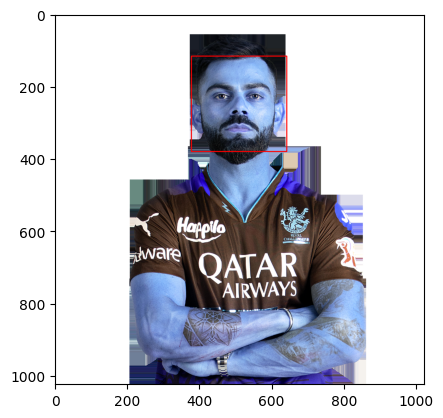

In [12]:
face_img = cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),2)
plt.imshow(face_img)

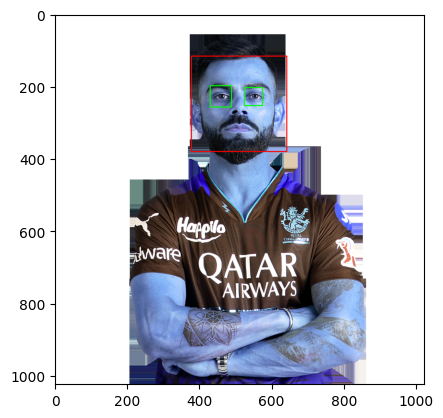

In [13]:
cv2.destroyAllWindows()
for (x,y,w,h) in faces:
    face_img = cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),2)
    roi_gray = gray[y:y+h, x:x+w]
    roi_color = face_img[y:y+h, x:x+w]
    eyes = eye_cascade.detectMultiScale(roi_gray)
    for (ex,ey,ew,eh) in eyes:
        cv2.rectangle(roi_color,(ex,ey),(ex+ew,ey+eh),(0,255,0),2)
        

plt.figure()
plt.imshow(face_img, cmap='gray')
plt.show()

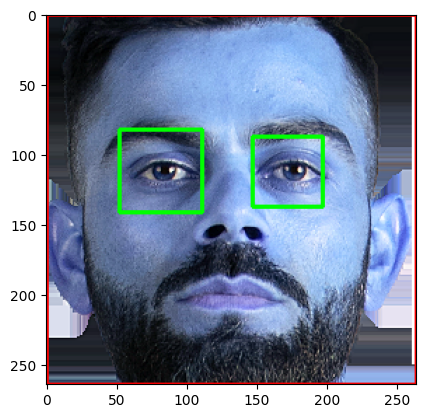

In [14]:
%matplotlib inline
plt.imshow(roi_color, cmap='gray')

In [15]:
def get_cropped_image_if_2_eyes(image_path):
    img = cv2.imread(image_path)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    faces = face_cascade.detectMultiScale(gray, 1.3, 5)
    for (x,y,w,h) in faces:
        roi_gray = gray[y:y+h, x:x+w]
        roi_color = img[y:y+h, x:x+w]
        eyes = eye_cascade.detectMultiScale(roi_gray)
        if len(eyes) >= 2:
            return roi_color

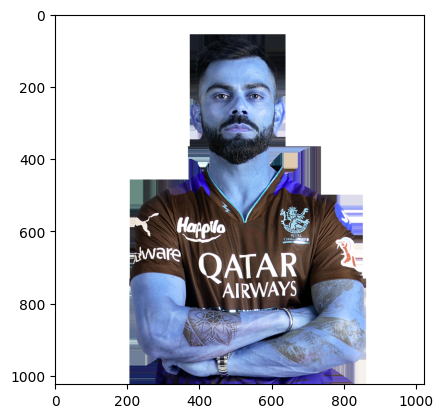

In [16]:
original_image = cv2.imread('C:/Users/swapn/Desktop/DS learning/Data Science project/Image recognization/CelebrityFaceRecognition/model/test_images/2.png')
plt.imshow(original_image)

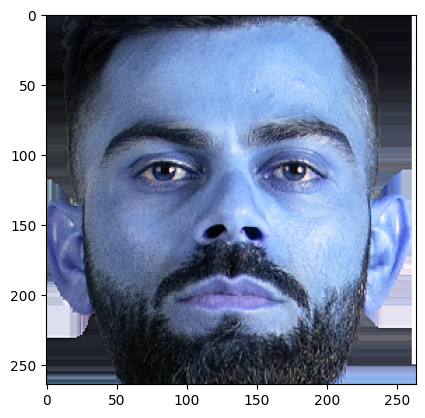

In [17]:
cropped_image = get_cropped_image_if_2_eyes('C:/Users/swapn/Desktop/DS learning/Data Science project/Image recognization/CelebrityFaceRecognition/model/test_images/2.png')
plt.imshow(cropped_image)

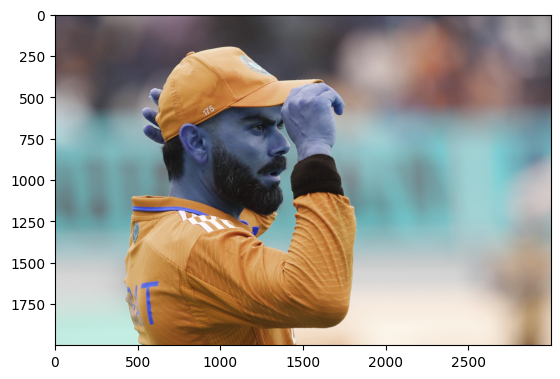

In [18]:
org_image_obstructed = cv2.imread("C:\\Users\\swapn\\Desktop\\DS learning\\Data Science project\\Image recognization\\CelebrityFaceRecognition\\model\\test_images\\Virat.jpg")
plt.imshow(org_image_obstructed)

In [41]:
cropped_image_no_2_eyes = get_cropped_image_if_2_eyes("C:\\Users\\swapn\\Desktop\\DS learning\\Data Science project\\Image recognization\\CelebrityFaceRecognition\\model\\test_images\\Virat.jpg")
cropped_image_no_2_eyes

In [66]:
path_to_data = "C:\\Users\\swapn\\Desktop\\DS learning\\Data Science project\\Image recognization\\CelebrityFaceRecognition\\model\\dataset"
path_to_cr_data = "C:\\Users\\swapn\\Desktop\\DS learning\\Data Science project\\Image recognization\\CelebrityFaceRecognition\\model\\dataset\\cropped"

In [67]:
import os
img_dirs = []
for entry in os.scandir(path_to_data):
    if entry.is_dir():
        img_dirs.append(entry.path)

In [68]:
img_dirs

['C:\\Users\\swapn\\Desktop\\DS learning\\Data Science project\\Image recognization\\CelebrityFaceRecognition\\model\\dataset\\cropped',
 'C:\\Users\\swapn\\Desktop\\DS learning\\Data Science project\\Image recognization\\CelebrityFaceRecognition\\model\\dataset\\messi images',
 'C:\\Users\\swapn\\Desktop\\DS learning\\Data Science project\\Image recognization\\CelebrityFaceRecognition\\model\\dataset\\nemar images',
 'C:\\Users\\swapn\\Desktop\\DS learning\\Data Science project\\Image recognization\\CelebrityFaceRecognition\\model\\dataset\\salman khan only',
 'C:\\Users\\swapn\\Desktop\\DS learning\\Data Science project\\Image recognization\\CelebrityFaceRecognition\\model\\dataset\\solena gomez image',
 'C:\\Users\\swapn\\Desktop\\DS learning\\Data Science project\\Image recognization\\CelebrityFaceRecognition\\model\\dataset\\virat kohli']

In [69]:
import shutil
if os.path.exists(path_to_cr_data):
     shutil.rmtree(path_to_cr_data)
os.mkdir(path_to_cr_data)

In [70]:
import os
import cv2

# Assuming get_cropped_image_if_2_eyes and other necessary components are defined above

cropped_image_dirs = []
celebrity_file_names_dict = {}
supported_formats = {".jpg", ".jpeg", ".png", ".bmp", ".tiff"}

for img_dir in img_dirs:
    count = 1
    celebrity_name = os.path.basename(img_dir)  # Cross-platform compatible way to get the last part of the path
    print(celebrity_name)
    
    celebrity_file_names_dict[celebrity_name] = []
    
    for entry in os.scandir(img_dir):
        if entry.is_file() and entry.path.lower().endswith(tuple(supported_formats)):  # Process only supported image files
            try:
                roi_color = get_cropped_image_if_2_eyes(entry.path)
                if roi_color is not None:
                    cropped_folder = os.path.join(path_to_cr_data, celebrity_name)  # Correctly forming the path

                    if not os.path.exists(cropped_folder):
                        os.makedirs(cropped_folder)
                        cropped_image_dirs.append(cropped_folder)
                        print("Generating cropped images in folder: ", cropped_folder)
                    
                    cropped_file_name = f"{celebrity_name}{count}.png"
                    cropped_file_path = os.path.join(cropped_folder, cropped_file_name)  # Correctly forming the file path

                    cv2.imwrite(cropped_file_path, roi_color)
                    celebrity_file_names_dict[celebrity_name].append(cropped_file_path)
                    count += 1
            except Exception as e:
                print(f"Error processing file {entry.path}: {e}")

# Continue with the rest of your code...


cropped
messi images
Generating cropped images in folder:  C:\Users\swapn\Desktop\DS learning\Data Science project\Image recognization\CelebrityFaceRecognition\model\dataset\cropped\messi images
Error processing file C:\Users\swapn\Desktop\DS learning\Data Science project\Image recognization\CelebrityFaceRecognition\model\dataset\messi images\lionel-messi-goal-celebration-celebrates-positive-emotion-reaction-thankful-pointing-poins-points-fingers-sky-god-religion-number-129917731.jpg: OpenCV(4.8.1) D:\a\opencv-python\opencv-python\opencv\modules\imgproc\src\color.cpp:182: error: (-215:Assertion failed) !_src.empty() in function 'cv::cvtColor'

Error processing file C:\Users\swapn\Desktop\DS learning\Data Science project\Image recognization\CelebrityFaceRecognition\model\dataset\messi images\_url=https_3A_2F_2Fcalifornia-times-brightspot.s3.amazonaws.com_2F6a_2F4a_2Fe41b4e73401da27a607536688f93_2Fsoccer-world-cup-last-dance-06549.jpg: OpenCV(4.8.1) D:\a\opencv-python\opencv-python\openc

In [71]:
import numpy as np
import pywt
import cv2    

def w2d(img, mode='haar', level=1):
    imArray = img
    #Datatype conversions
    #convert to grayscale
    imArray = cv2.cvtColor( imArray,cv2.COLOR_RGB2GRAY )
    #convert to float
    imArray =  np.float32(imArray)   
    imArray /= 255;
    # compute coefficients 
    coeffs=pywt.wavedec2(imArray, mode, level=level)

    #Process Coefficients
    coeffs_H=list(coeffs)  
    coeffs_H[0] *= 0;  

    # reconstruction
    imArray_H=pywt.waverec2(coeffs_H, mode);
    imArray_H *= 255;
    imArray_H =  np.uint8(imArray_H)

    return imArray_H

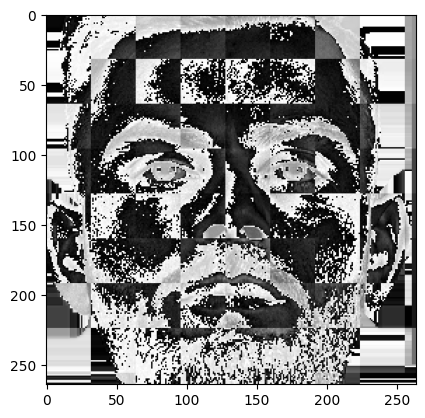

In [72]:
im_har = w2d(cropped_image,'db1',5)
plt.imshow(im_har, cmap='gray')

In [79]:
celebrity_file_names_dict = {}
for img_dir in cropped_image_dirs:
    celebrity_name = img_dir.split('\\')[-1]
    file_list = []
    for entry in os.scandir(img_dir):
        file_list.append(entry.path)
    celebrity_file_names_dict[celebrity_name] = file_list
celebrity_file_names_dict

{'messi images': ['C:\\Users\\swapn\\Desktop\\DS learning\\Data Science project\\Image recognization\\CelebrityFaceRecognition\\model\\dataset\\cropped\\messi images\\messi images1.png',
  'C:\\Users\\swapn\\Desktop\\DS learning\\Data Science project\\Image recognization\\CelebrityFaceRecognition\\model\\dataset\\cropped\\messi images\\messi images10.png',
  'C:\\Users\\swapn\\Desktop\\DS learning\\Data Science project\\Image recognization\\CelebrityFaceRecognition\\model\\dataset\\cropped\\messi images\\messi images11.png',
  'C:\\Users\\swapn\\Desktop\\DS learning\\Data Science project\\Image recognization\\CelebrityFaceRecognition\\model\\dataset\\cropped\\messi images\\messi images12.png',
  'C:\\Users\\swapn\\Desktop\\DS learning\\Data Science project\\Image recognization\\CelebrityFaceRecognition\\model\\dataset\\cropped\\messi images\\messi images13.png',
  'C:\\Users\\swapn\\Desktop\\DS learning\\Data Science project\\Image recognization\\CelebrityFaceRecognition\\model\\datase

In [80]:
class_dict = {}
count = 0
for celebrity_name in celebrity_file_names_dict.keys():
    class_dict[celebrity_name] = count
    count = count + 1
class_dict


{'messi images': 0,
 'nemar images': 1,
 'salman khan only': 2,
 'solena gomez image': 3,
 'virat kohli': 4}

In [81]:
X, y = [], []
for celebrity_name, training_files in celebrity_file_names_dict.items():
    for training_image in training_files:
        img = cv2.imread(training_image)
        scalled_raw_img = cv2.resize(img, (32, 32))
        img_har = w2d(img,'db1',5)
        scalled_img_har = cv2.resize(img_har, (32, 32))
        combined_img = np.vstack((scalled_raw_img.reshape(32*32*3,1),scalled_img_har.reshape(32*32,1)))
        X.append(combined_img)
        y.append(class_dict[celebrity_name]) 

In [82]:
len(X[0])

4096

In [83]:
X = np.array(X).reshape(len(X),4096).astype(float)
X.shape

(312, 4096)

In [84]:
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report

In [85]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

pipe = Pipeline([('scaler', StandardScaler()), ('svc', SVC(kernel = 'rbf', C = 10))])
pipe.fit(X_train, y_train)
pipe.score(X_test, y_test)

0.8589743589743589

In [ ]:
print(classification_report(y_test, pipe.predict(X_test)))

In [88]:
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import GridSearchCV

In [89]:
model_params = {
    'svm': {
        'model': svm.SVC(gamma='auto',probability=True),
        'params' : {
            'svc__C': [1,10,100,1000],
            'svc__kernel': ['rbf','linear']
        }  
    },
    'random_forest': {
        'model': RandomForestClassifier(),
        'params' : {
            'randomforestclassifier__n_estimators': [1,5,10]
        }
    },
    'logistic_regression' : {
        'model': LogisticRegression(solver='liblinear',multi_class='auto'),
        'params': {
            'logisticregression__C': [1,5,10]
        }
    }
}

In [90]:
scores = []
best_estimators = {}
import pandas as pd
for algo, mp in model_params.items():
    pipe = make_pipeline(StandardScaler(), mp['model'])
    clf =  GridSearchCV(pipe, mp['params'], cv=5, return_train_score=False)
    clf.fit(X_train, y_train)
    scores.append({
        'model': algo,
        'best_score': clf.best_score_,
        'best_params': clf.best_params_
    })
    best_estimators[algo] = clf.best_estimator_
    
df = pd.DataFrame(scores,columns=['model','best_score','best_params'])
df

,model,best_score,best_params
0,svm,0.833210,"{'svc__C': 1, 'svc__kernel': 'linear'}"
1,random_forest,0.705088,{'randomforestclassifier__n_estimators': 10}
2,logistic_regression,0.845976,{'logisticregression__C': 1}


In [ ]:
best_estimators

In [91]:
best_estimators['svm'].score(X_test,y_test)

0.8589743589743589

In [92]:
best_estimators['random_forest'].score(X_test,y_test)

0.7692307692307693

In [93]:
best_estimators['logistic_regression'].score(X_test,y_test)

0.9230769230769231

In [94]:
best_clf = best_estimators['svm']

In [95]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, best_clf.predict(X_test))
cm

array([[ 3,  4,  0,  1,  0],
       [ 0, 36,  0,  0,  0],
       [ 0,  1,  4,  2,  0],
       [ 0,  0,  2, 23,  0],
       [ 0,  0,  1,  0,  1]], dtype=int64)

Text(95.72222222222221, 0.5, 'Truth')

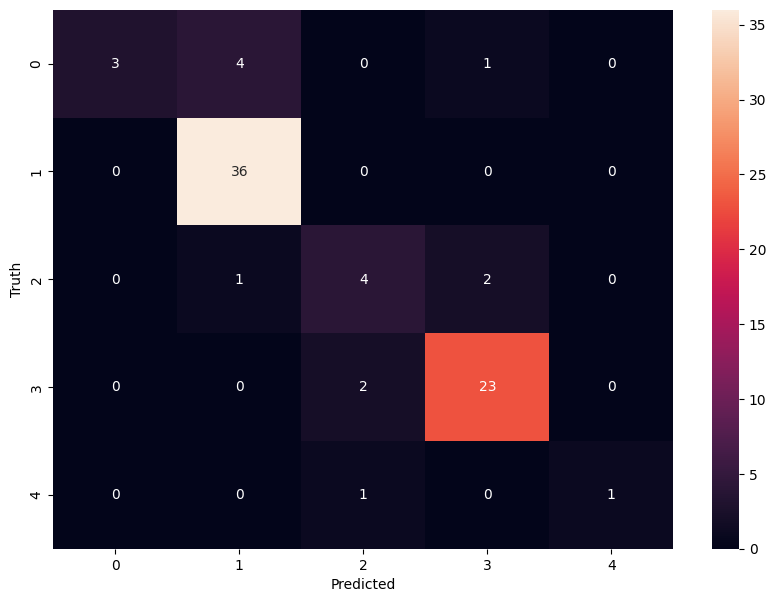

In [96]:
import seaborn as sn
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [97]:
!pip install joblib
import joblib 
# Save the model as a pickle in a file 
joblib.dump(best_clf, 'saved_model.pkl') 

['saved_model.pkl']

In [98]:
import json
with open("class_dictionary.json","w") as f:
    f.write(json.dumps(class_dict))